**Partie 1 — Regression en action**

Exercice 1 :

Étape 1 : Importation des bibliothèques

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

Étape 2 : Importer le jeu de données

In [2]:
dataset = pd.read_csv('Salary_Data.csv')# .head(5)
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1:]


Étape 3 : Diviser l'ensemble de données en ensemble d'apprentissage et en ensemble 
de test

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 


Étape 4 : Entraîner le modèle de régression linéaire simple sur l'ensemble 
d'entraînement

In [ ]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(X_train, y_train)

Étape 5 : Prédire les résultats de l'ensemble de tests

In [5]:

y_pred =pd.DataFrame(np.array(regressor.predict(X_test)),
                 columns=['a'])
y_pred


,a
0,102561.550302
1,73529.307070
2,55735.351541
3,75402.355021
4,62291.019368
5,67910.163219


Étape 6 : Comparaison de l'ensemble de test avec les valeurs prédites

In [6]:
df = pd.DataFrame(data={'Real Values':y_test["Salary"].values, 'Predicted Values':y_pred["a"].values}) 
df 

,Real Values,Predicted Values
0,113812.0,102561.550302
1,66029.0,73529.307070
2,64445.0,55735.351541
3,83088.0,75402.355021
4,63218.0,62291.019368
5,61111.0,67910.163219


Étape 7 : Visualiser les résultats

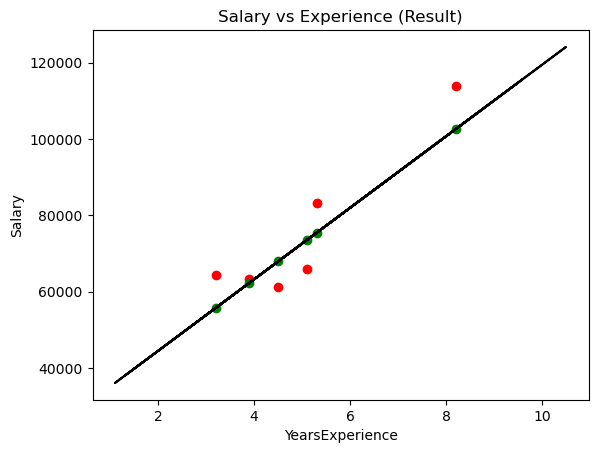

In [7]:
plt.scatter(X_test, y_test, color = 'red') 
plt.scatter(X_test, y_pred, color = 'green') 
plt.plot(X_train.values,pd.DataFrame(np.array(regressor.predict(X_train)),
                 columns=['a']).values, color = 'black') 
plt.title('Salary vs Experience (Result)') 
plt.xlabel('YearsExperience') 
plt.ylabel('Salary') 
plt.show()

Exercice 2

Étape 1 : Importation des bibliothèques 

In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

Étape 2 : Importer le jeu de données 

In [9]:
dataset = pd.read_csv('50_Startups.csv')#.head(5)
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1:]
X

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida
5,131876.90,99814.71,362861.36,New York
6,134615.46,147198.87,127716.82,California
7,130298.13,145530.06,323876.68,Florida
8,120542.52,148718.95,311613.29,New York
9,123334.88,108679.17,304981.62,California


Étape 3 : Encodage des données catégorielles

In [10]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder 
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')

X = ct.fit_transform(X)

X=pd.DataFrame(np.array(X),columns=[ "State0" ,"State1" ,"State2" ,"R&D Spend"	,"Administration"	,"Marketing Spend"	])
X

,State0,State1,State2,R&D Spend,Administration,Marketing Spend
0,0.0,0.0,1.0,165349.20,136897.80,471784.10
1,1.0,0.0,0.0,162597.70,151377.59,443898.53
2,0.0,1.0,0.0,153441.51,101145.55,407934.54
3,0.0,0.0,1.0,144372.41,118671.85,383199.62
4,0.0,1.0,0.0,142107.34,91391.77,366168.42
5,0.0,0.0,1.0,131876.90,99814.71,362861.36
6,1.0,0.0,0.0,134615.46,147198.87,127716.82
7,0.0,1.0,0.0,130298.13,145530.06,323876.68
8,0.0,0.0,1.0,120542.52,148718.95,311613.29
9,1.0,0.0,0.0,123334.88,108679.17,304981.62


Étape 4 : Diviser l'ensemble de données en ensemble d'apprentissage et en ensemble 
de test

In [11]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 

Étape 5 : Entraîner le modèle de régression linéaire multiple sur l'ensemble 
d'entraînement 

In [ ]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

Étape 6 : Prédire les résultats de l'ensemble de test

In [13]:
y_pred =pd.DataFrame(np.array(regressor.predict(X_test)),
                 columns=['a'])
y_pred

,a
0,109954.897570
1,148159.945065
2,114304.704464
3,134309.152397
4,115955.684504
5,129462.217695
6,84673.255737
7,99400.595524
8,173936.185679
9,114065.040798


Étape 7 : Comparaison de l'ensemble de test avec les valeurs prédites 

In [14]:
df = pd.DataFrame(data={'Real Values':y_test["Profit"].values, 'Predicted Values':y_pred["a"].values}) 
df

,Real Values,Predicted Values
0,108733.99,109954.897570
1,129917.04,148159.945065
2,110352.25,114304.704464
3,144259.40,134309.152397
4,108552.04,115955.684504
5,141585.52,129462.217695
6,96712.80,84673.255737
7,107404.34,99400.595524
8,166187.94,173936.185679
9,126992.93,114065.040798


Exercice 3 

Étape 1 : Importation des bibliothèques

In [15]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

Étape 2 : Importer le jeu de données 

In [23]:
dataset = pd.read_csv('Position_Salaries.csv')#.head(5)
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


Étape 3 : Entraîner le modèle de régression polynomiale sur l'ensemble de données

In [ ]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
poly_reg = PolynomialFeatures(degree = 4) 
X_poly = poly_reg.fit_transform(X) 
lin_reg = LinearRegression() 
lin_reg.fit(X_poly, y)

Étape 4 : Prédire les résultats

In [18]:
y_pred = lin_reg.predict(X_poly)

Étape 5 : Comparer les valeurs réelles avec les valeurs prédites

In [19]:
df = pd.DataFrame({'Real Values':y, 'Predicted Values':y_pred}) 
df 

,Real Values,Predicted Values
0,45000,53356.643357
1,50000,31759.906760
2,60000,58642.191142
3,80000,94632.867133
4,110000,121724.941725
5,150000,143275.058275
6,200000,184003.496504
7,300000,289994.172494
8,500000,528694.638694
9,1000000,988916.083916


Étape 6 : Visualisation des résultats de la régression polynomiale

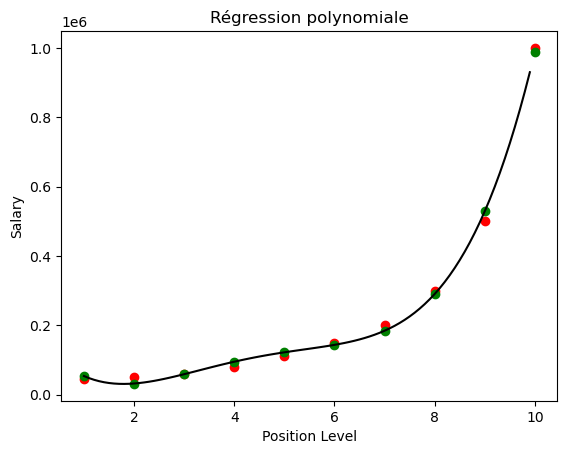

In [20]:
X_grid = np.arange(min(X), max(X), 0.1)  
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X, y, color = 'red')  
plt.scatter (X, y_pred, color = 'green')  
plt.plot(X_grid, lin_reg.predict(poly_reg.fit_transform(X_grid)), color = 'black')  
plt.title('Régression polynomiale')  
plt.xlabel('Position Level')  
plt.ylabel('Salary')  
plt.show()